# (1) 2.1: Unsupervised Learning Algorithms

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
# This option ensures the charts you create are displayed in the notebook without needing to "call" them specifically.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Suppress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)


In [6]:
path = r'C:\Users\nvak6\Machine Learning with Python'
#Read in the European weather data.
prediction = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
prediction

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,...,5,0.88,1.00,0.45,0.34,0,4.70,8.50,6.00,10.90
1,19600102,1,6,2.10,0.84,1.02,0.36,1.05,0,1.10,...,7,0.91,1.00,0.25,0.84,0,0.70,8.90,5.60,12.10
2,19600103,1,8,2.10,0.90,1.02,0.18,0.30,0,0.00,...,7,0.91,1.01,0.17,0.08,0,0.10,10.50,8.10,12.90
3,19600104,1,3,2.10,0.92,1.02,0.58,0.00,0,4.10,...,7,0.86,1.02,0.13,0.98,0,0.00,7.40,7.30,10.60
4,19600105,1,6,2.10,0.95,1.02,0.65,0.14,0,5.40,...,3,0.80,1.03,0.46,0.00,0,5.70,5.70,3.00,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22946,20221028,10,6,2.10,0.77,1.02,1.34,0.22,0,5.40,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22947,20221029,10,4,2.10,0.76,1.02,1.34,0.22,0,6.10,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50
22948,20221030,10,5,2.10,0.80,1.02,1.34,0.22,0,5.80,...,5,0.82,1.01,1.13,0.41,0,3.40,10.70,7.90,13.50


In [8]:
#Read in the Pleasant weather data.
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Merge data sets using an inner join
df = prediction.merge(pleasant, on='DATE', how='inner')

In [16]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,...,0,0,0,0,0,0,0,0,0,0
1,19600102,1,6,2.10,0.84,1.02,0.36,1.05,0,1.10,...,0,0,0,0,0,0,0,0,0,0
2,19600103,1,8,2.10,0.90,1.02,0.18,0.30,0,0.00,...,0,0,0,0,0,0,0,0,0,0
3,19600104,1,3,2.10,0.92,1.02,0.58,0.00,0,4.10,...,0,0,0,0,0,0,0,0,0,0
4,19600105,1,6,2.10,0.95,1.02,0.65,0.14,0,5.40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,...,0,0,0,0,0,0,0,0,0,0
22946,20221028,10,6,2.10,0.77,1.02,1.34,0.22,0,5.40,...,0,0,0,0,0,0,0,0,0,0
22947,20221029,10,4,2.10,0.76,1.02,1.34,0.22,0,6.10,...,0,0,0,0,0,0,0,0,0,0
22948,20221030,10,5,2.10,0.80,1.02,1.34,0.22,0,5.80,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.dtypes

DATE                            int64
MONTH                           int64
BASEL_cloud_cover               int64
BASEL_wind_speed              float64
BASEL_humidity                float64
                               ...   
MUNCHENB_pleasant_weather       int64
OSLO_pleasant_weather           int64
SONNBLICK_pleasant_weather      int64
STOCKHOLM_pleasant_weather      int64
VALENTIA_pleasant_weather       int64
Length: 185, dtype: object

In [20]:
# Convert the 'DATE' column to string type
df['DATE'] = df['DATE'].astype(str)

# Extract the year from the 'DATE' column and convert it to integer type
df['Year'] = df['DATE'].str[:4].astype(int)

# Filter the DataFrame for the years between 2012 and 2022
features = df[(df['Year'] >= 2012) & (df['Year'] <= 2022)]

# Now 'features' contains data only for the years between 2012 and 2022


In [22]:
features

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,Year
18993,20120101,1,8,1.90,0.79,1.02,0.32,0.00,0,0.00,...,0,0,0,0,0,0,0,0,0,2012
18994,20120102,1,8,3.10,0.87,1.02,0.18,0.75,0,0.00,...,0,0,0,0,0,0,0,0,0,2012
18995,20120103,1,5,3.10,0.72,1.02,0.53,0.70,0,3.40,...,0,0,0,0,0,0,0,0,0,2012
18996,20120104,1,5,5.10,0.70,1.02,0.45,0.09,0,2.90,...,0,0,0,0,0,0,0,0,0,2012
18997,20120105,1,7,7.80,0.73,1.01,0.26,1.12,0,0.30,...,0,0,0,0,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,...,0,0,0,0,0,0,0,0,0,2022
22946,20221028,10,6,2.10,0.77,1.02,1.34,0.22,0,5.40,...,0,0,0,0,0,0,0,0,0,2022
22947,20221029,10,4,2.10,0.76,1.02,1.34,0.22,0,6.10,...,0,0,0,0,0,0,0,0,0,2022
22948,20221030,10,5,2.10,0.80,1.02,1.34,0.22,0,5.80,...,0,0,0,0,0,0,0,0,0,2022


In [24]:
# Drop the 'MONTH' column and create a copy of the DataFrame
features_c = features.drop(columns=['MONTH']).copy()

# Display the DataFrame
features_c


,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,Year
18993,20120101,8,1.90,0.79,1.02,0.32,0.00,0,0.00,11.40,...,0,0,0,0,0,0,0,0,0,2012
18994,20120102,8,3.10,0.87,1.02,0.18,0.75,0,0.00,7.30,...,0,0,0,0,0,0,0,0,0,2012
18995,20120103,5,3.10,0.72,1.02,0.53,0.70,0,3.40,7.20,...,0,0,0,0,0,0,0,0,0,2012
18996,20120104,5,5.10,0.70,1.02,0.45,0.09,0,2.90,6.90,...,0,0,0,0,0,0,0,0,0,2012
18997,20120105,7,7.80,0.73,1.01,0.26,1.12,0,0.30,6.80,...,0,0,0,0,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1,2.10,0.79,1.02,1.34,0.22,0,7.70,15.90,...,0,0,0,0,0,0,0,0,0,2022
22946,20221028,6,2.10,0.77,1.02,1.34,0.22,0,5.40,16.70,...,0,0,0,0,0,0,0,0,0,2022
22947,20221029,4,2.10,0.76,1.02,1.34,0.22,0,6.10,16.70,...,0,0,0,0,0,0,0,0,0,2022
22948,20221030,5,2.10,0.80,1.02,1.34,0.22,0,5.80,15.40,...,0,0,0,0,0,0,0,0,0,2022


In [26]:
# Export the newly merged dataset with the last decade's features, excluding the 'MONTH' column
features_c.to_csv(os.path.join(path,'features-last-decade.csv'), index=False)


In [28]:
# Count of pleasant weather days in the last decade
features_c['VALENTIA_pleasant_weather'].value_counts(dropna=False)


VALENTIA_pleasant_weather
0    3957
Name: count, dtype: int64

In [30]:
# Count of pleasant weather days over the last 60 years
pleasant['VALENTIA_pleasant_weather'].value_counts(dropna=False)

VALENTIA_pleasant_weather
0    21776
1     1174
Name: count, dtype: int64

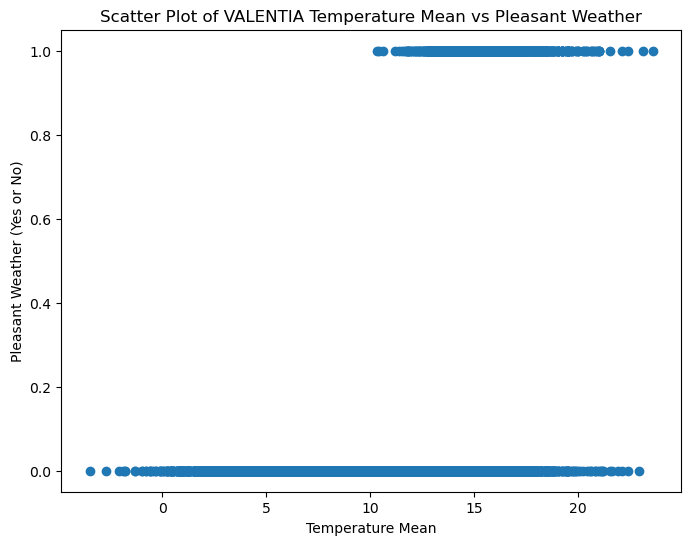

In [32]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['VALENTIA_temp_mean'], df['VALENTIA_pleasant_weather'])
plt.xlabel('Temperature Mean')
plt.ylabel('Pleasant Weather (Yes or No)')
plt.title('Scatter Plot of VALENTIA Temperature Mean vs Pleasant Weather')

# Specify the path and file name
output_file = r"C:\Users\nvak6\Machine Learning with Python\Scatter Plot of VALENTIA Temperature Mean vs Pleasant Weather.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

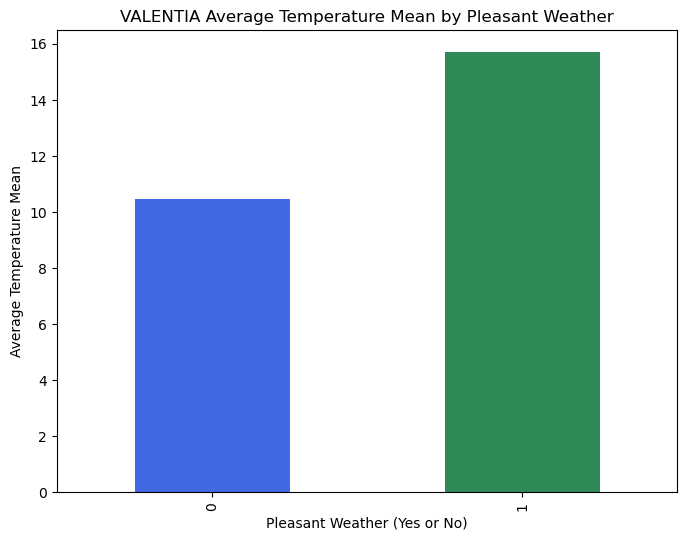

In [34]:
# Calculate the average temperature mean for each category of pleasant weather
mean_temp_by_weather = df.groupby('VALENTIA_pleasant_weather')['VALENTIA_temp_mean'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
mean_temp_by_weather.plot(kind='bar', color=['royalblue', 'seagreen'])  # Assuming blue for 'No' and green for 'Yes'
plt.xlabel('Pleasant Weather (Yes or No)')
plt.ylabel('Average Temperature Mean')
plt.title('VALENTIA Average Temperature Mean by Pleasant Weather')

# Optional: Rotate x-axis labels for better readability
# plt.xticks(rotation=0)  
# Optional: Add grid lines on the y-axis
# plt.grid(axis='y')  

# Specify the path and file name
output_file = r"C:\Users\nvak6\Machine Learning with Python\VALENTIA Average Temperature Mean by Pleasant Weather.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

In [36]:
# Filter columns ending with '_pleasant_weather' and '_temp_mean'
pleasant_cols = [col for col in df.columns if col.endswith('_pleasant_weather')]
temp_mean_cols = [col for col in df.columns if col.endswith('_temp_mean')]

In [38]:
# Extract relevant data
pleasant_data = df[pleasant_cols]  # Subset of dataframe with pleasant weather columns
temp_mean_data = df[temp_mean_cols]  # Subset of dataframe with temperature mean columns

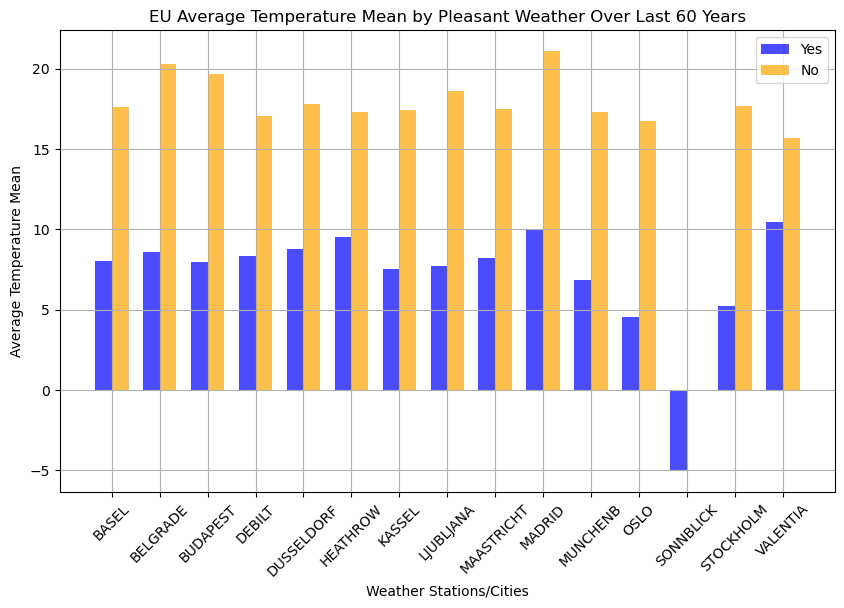

In [40]:
# Calculate the overall average temperature mean for each category of pleasant weather
mean_temp_by_weather = {}
for col in pleasant_data.columns:
    if col.endswith('_pleasant_weather'):
        temp_col = col.replace('_pleasant_weather', '_temp_mean')
        mean_temp_by_weather[col] = (
            temp_mean_data[temp_col][pleasant_data[col] == 1].mean(),
            temp_mean_data[temp_col][pleasant_data[col] == 0].mean()
        )

# Plotting
plt.figure(figsize=(10, 6))

# Extracting data for plotting
labels = [col.replace('_pleasant_weather', '') for col in mean_temp_by_weather.keys()]
mean_temp_yes = [value[1] for value in mean_temp_by_weather.values()]
mean_temp_no = [value[0] for value in mean_temp_by_weather.values()]

x = range(len(labels))
width = 0.35

# Plot bars for 'Yes' and 'No' pleasant weather answers
plt.bar(x, mean_temp_yes, width, label='Yes', color='blue', alpha=0.7)
plt.bar([i + width for i in x], mean_temp_no, width, label='No', color='orange', alpha=0.7)

plt.xlabel('Weather Stations/Cities')
plt.ylabel('Average Temperature Mean')
plt.title('EU Average Temperature Mean by Pleasant Weather Over Last 60 Years')
plt.xticks([i + width / 2 for i in x], labels, rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)

# Specify the path and file name
output_file = r"C:\Users\nvak6\Machine Learning with Python\EU Average Temperature Mean by Pleasant Weather Over Last 60 Years.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()